# Improving Heart Disease Prediction in Machine Learning Classification Algorithms


### Abstract: 
In this article, two Logistic Regression algorithms, one using the polynomial basis
and the other using a wavelet basis are trained to improve the prediction of heart disease.
The results of the comparison of the models show that the wavelet method is more efficient and
can make a much better prediction.

I should mention that this wavelet method also improves the prediction of other classification algorithms 
in machine learning using the polynomial basis, such as Softmax classifier, Support vector machine, Neural networks, etc.

Keywords: Machine Learning, Logistic Regression, Haar Wavelet, Heart Disease.

## Table of Contents
#### 1- Logistic Regression Using Polynomial Basis
    1.1 Sigmoid Function
    1.2 Cost Function
    1.3 Gradient Descent
#### 2. Wavelet Method
    2.1. Haar Wavelet
    2.2 Cost Function and Gradient Descent for Haar Wavelet Method
#### 3. Implementation in Python
    3.1 Data Engineering and ETL
    3.2 Data visualization and Outliers
    3.3 Correlations
    3.4 Training the First Model
    3.5 Wavelet Method
    3.6 Conclusions

## 1- Logistic Regression Using Polynomial Basis

In this section, we discusses the basics of Logistic Regression using polynomial basis.
Logistic regression is basically a supervised classification algorithm.
In a classification problem, the target variable(or output), y, can take
only discrete values for given set of features(or inputs), X. The model builds
a regression model to predict the probability that a given data entry belongs to the category numbered as “1”. 
Just like Linear regression assumes that the data follows a linear function, Logistic regression models the 
data using the sigmoid function.

### 1.1 Sigmoid Function

Sigmoid function is represented as follows:

$$Sigm(x)=\frac{1}{1+e^{-x}}.$$

The output of the Sigmoid function ranges from 0 to 1. Logistic regression uses an equation as the representation, 
very much like linear regression. Input values (X) are combined linearly using weights or coefficient values to predict
an output value (y). A key difference from linear regression is that the output value being modeled is
a binary value (0 or 1) rather than a numeric value. As we know, a Linear Regression model can be represented by the following equation:
$$ l_{\omega}(x)=\omega_{0}+\omega_{1}x,$$
where $ \ x \in X$ and $\omega=(\omega_{0},\omega_{1})$ is the parameter vector, which is supposed to be obtained.

Applying the sigmoid function to the output of the linear regression, we get
$$ h_{\omega}(x)=Sigm(\omega_{0}+\omega_{1}x)=\frac{1}{e^{-(\omega_{0}+\omega_{1}x)}}.$$
By adding a column of the unit values to the matrix X, $h_{\omega}$ has the following matrix form:
$$ h_{\omega}(X)=\frac{1}{e^{-Xw^{T}}}.$$

Our aim is to obtain the best parameter vector $\omega$, such that for a given input  $x \in X$ we can predict whether x belongs to class 1(y=1) or not.
For such optimal parameter vector $\omega$, if $h_{\omega}(x)>0.5$, we say that x belongs to class 1 and if $h_{\omega}(x)\leq 0.5$, x belongs to class 0.

### 1.2 Cost Function

To obtain the best value for  parameter vector $\omega$, we use a cost(loss) function J, such that $\omega$ minimizes J.
Since the output y only takes the values 0,1, it has a Bernoulli distribution. So, we assume
$$ p(y=1\vert x_{i}, \omega)=h_{\omega}(x_{i}), \ \ \ \ x_{i} \in X, \ i=1,..., m$$
and
$$ p(y=0\vert x_{i}, \omega)=1-h_{\omega}(x_{i}).$$
In fact
$$ p(y\vert x_{i}, \omega)= h_{\omega}(x_{i})^{y}(1-h_{\omega}(x_{i}))^{1-y}, \ \ \ \ \ y\in \lbrace 0,1\rbrace.$$
The likelihood function for above distribution is defined as follows:
$$L(\omega)=p(Y\vert X, \omega)=\prod_{i=1}^{m}p(y_{i}\vert x_{i}, \omega)=\prod_{i=1}^{m} h_{\omega}(x_{i})^{y_{i}}(1-h_{\omega}(x_{i}))^{1-y_{i}}.$$
We are looking for $\omega$ that maximizes the above likelihood function. 
This is equivalent to saying that we are looking for $\omega$ that maximizes  $log(L(\omega))$.
So, let
$$M(\omega)=log(L(\omega))=\sum_{i=1}^{m} y_{i} log(h_{\omega}(x_{i}))+(1-y_{i})log(1-h_{\omega}(x_{i})),$$
this method is called maximum likelihood estimation.

Now, using $M(\omega)$ we can define the cost function as follows:
$$J(\omega)=-\sum_{i=1}^{m} y_{i} log(h_{\omega}(x_{i}))-(1-y_{i})log(1-h_{\omega}(x_{i})),$$
in other words, if $\omega$ minimizes J, it maximizes M. The function J is called binary cross entropy loss function.

Since, I am going to do regularization to contorol the value of $\omega$, I add a regularization term to J and then for simplification I use the mean.
So,
$$J(w)=-\frac{1}{m}\sum_{i=1}^{m} y_{i} log(h_{\omega}(x_{i}))-(1-y_{i})log(1-h_{\omega}(x_{i}))+\frac{\lambda}{2}\omega\omega^{T},$$
wher $\lambda$ is the penalty term or regularization parameter, which determines how much to penalize the  parameter $\omega$.
When $\lambda$ is zero then the regularization term becomes zero. We are back to the original loss function.

The matrix form of J is as follows:
    $$J(w)=-\frac{1}{m} y log(h_{\omega}(X))-(1-y)log(1-h_{\omega}(X))+\frac{\lambda}{2} \omega\omega^{T}.$$


### 1.3 Gradient Descent

Gradient Descent is the process of minimizing a function by following the gradient of the function.
This involves knowing the form of the function as well as the derivative so that from a given point you know
the gradient and can move in that direction, e.g. downhill towards the minimum value. 
I am going to use the Gradient Descent method to minimize the above cost function J. 

Gradient Descent has the following formula:
$$\omega_{j+1} =\omega_{j} -\alpha \frac{\partial J(\omega_{j})}{\omega_{j}}, \ \ \ \ j=0,1,...\ \ \ \ \text{repeat until convergence,}$$
where $\alpha$ is called learning rate and $\omega_{0}$ is given by us. The learning rate controls 
how quickly $\omega_{j}$ goes towards the optimal parameter $\omega$.
For the cost function $J$ we have,
$$\frac{\partial J(\omega_{j})}{\omega_{j}}=\frac{1}{m}\sum_{i=1}^{m}  (h_{w_{j}}(x_{i})-y_{i})x_{i}+\lambda w_{j}$$
and then
$$\omega_{j+1} =\omega_{j} -\alpha \big(\frac{1}{m}\sum_{i=1}^{m}  (h_{w_{j}}(x_{i})-y_{i})x_{i}+\lambda w_{j}\big),\ \  \ \text{repeat until convergence.}$$


When we obtained  $\omega$, using the function $h_{\omega}$ we can do the prediction for a new input x.

## 2. Wavelet Method

In mathematics, the Haar wavelet is a sequence of rescaled "square-shaped" functions which together
form a wavelet family or basis. Wavelet analysis is similar to Fourier analysis in that it allows a
target function over an interval to be represented in terms of an orthonormal basis.
The Haar sequence is now recognized as the first known wavelet basis.

### 2.1 Haar Wavelet 

The Haar wavelet family on $[0,1]$  is as follows:
\begin{equation}
  h_{i}(x)=\begin{cases}
    1 & \text{if} \ \ x \in\ [\lambda_{1}, \lambda_{2})\\
    -1 & \text{if}\ \ x \in\ (\lambda_{2}, \lambda_{3}]\\
    0 & \text{otherwise},
  \end{cases}
\end{equation}
such that
$$\lambda_{1}=\frac{k}{m},\quad\lambda_{2}=\frac{(k+\frac{1}{2})}{m},\quad\lambda_{3}=\frac{(k+1)}{m},$$ 
 and $m=2^{j}; j=0,1,...,J$ indicates the level of the wavelet; and $ k=0,1,...,m-1 $ is the translation parameter. 
The index $i$ is calculated according to the formula $ i=m+k+1.$ In the case $m=1$ and $k=0$, 
we have $i=2$ and  the maximal value of $i$ is $2M$ where $M=2^{J}.$ 
It is assumed that the value $i = 1$ corresponds to the scaling function for which $h_{1}(x)=1$ for $x\in[0,1]$.

### 2.2 Cost Function and Gradient Descent for Haar Wavelet Method

In the following, I am going to use the first two wavelet functions $h_{1}, h_{2}$ to solve a Logistic regression problem.
In this method, a Linear Regression model can be represented by:
 $$ l_{\omega}(x)=\omega_{0}h_{1}(x)+\omega_{1}h_{2}(x).$$
Like polynomial method, applying the sigmoid function to the output of the linear regression, we get
$$ h_{\omega}(x)=Sigm(\omega_{0}h_{1}(x)+\omega_{1}h_{2}(x))=\frac{1}{e^{-(\omega_{0}h_{1}(x)+\omega_{1}h_{2}(x))}}.$$
                               
The cost function and Gradient Descent formula for the Haar wavelet method are respectively as follows:                              
$$J(w)=-\frac{1}{m}\sum_{i=1}^{m} y_{i} log(h_{\omega}(x_{i}))-(1-y_{i})log(1-h_{\omega}(x_{i}))+\frac{\lambda}{2}\omega\omega_{T}$$
and
$$\omega_{j+1} =\omega_{j} -\alpha [\frac{1}{m}\sum_{i=1}^{m}  (h_{\omega_{j}}(x_{i})-y_{i})x_{i}+\lambda \omega_{j}],\ \  \ \text{repeat until convergence.}$$
                        
with this difference that in the above formulas
$$ h_{\omega}(x)=\frac{1}{e^{-(\omega_{0}h_{1}(x)+\omega_{1}h_{2}(x))}}.$$

In the following I am going to apply both methods to the Heart Disease Dataset to show that Haar wavelet method is
more efficient to predict heart disease.
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V.
It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset
of 14 of them. The "target" field refers to the presence of heart disease in the patient.
It is integer valued 0 = no disease and 1 = disease.

## 3. Implementation in Python   

### 3.1 Data Engineering and ETL

In [1]:
# libraries for ETL
import pandas as pd
import numpy as np
# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data=pd.read_csv("C:\\Users\\Majid1\\Desktop\\Jupeyetr\\Github\\Nueral Networks\\heart.csv")
# Loading the dta using pandas

In [3]:
print('The number of columns in data frame =', data.shape[1])

print('The number of rows data frame =', data.shape[0])

The number of columns in data frame = 14
The number of rows data frame = 303


In [4]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attribute Information: 

1. age 
    
2. sex 

3. chest pain type (4 values) 

4. resting blood pressure 

5. serum cholestoral in mg/dl 

6. fasting blood sugar > 120 mg/dl 

7. resting electrocardiographic results (values 0,1,2) 

8. maximum heart rate achieved 

9. exercise induced angina 

10. oldpeak = ST depression induced by exercise relative to rest 

11. the slope of the peak exercise ST segment 

12. number of major vessels (0-3) colored by flourosopy 

13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14. target1 or 0


In [5]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


It's good, we don't have any missing data in Data Frame.

### 3.2 Data visualization and Outliers

The distribution of the data.

In [6]:
def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

In [7]:
# using different colours in plots
colors= ['C{}'.format(i) for i in range(14)]

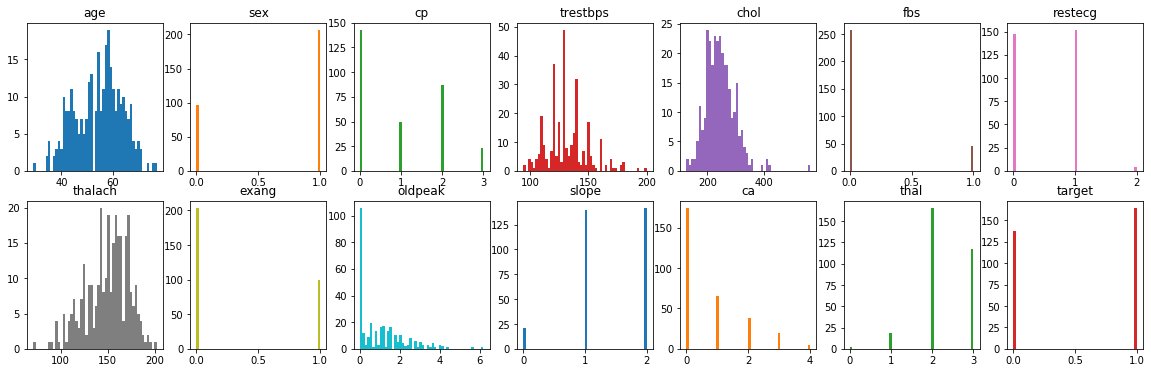

In [8]:
fig,axs=plt.subplots(2,7, figsize=(20,6))
axs = trim_axs(axs, len(data.columns))
for c, color, ax in zip(data.columns, colors, axs):
    ax.hist(data[c], bins=50, color=color)
    ax.set_title(c)
plt.show()

The distribution of data tells us some features have outliers. To detect outliers, I use seaborn boxplot.

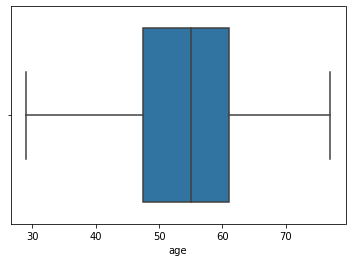

In [10]:
sns.boxplot(x=data["age"],color="C0")

This shows us, there are no outliers in the age column.

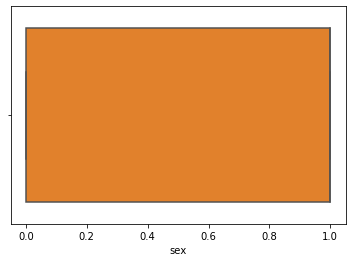

In [11]:
sns.boxplot(x=data["sex"],color="C1")

No outliers in the sex column.

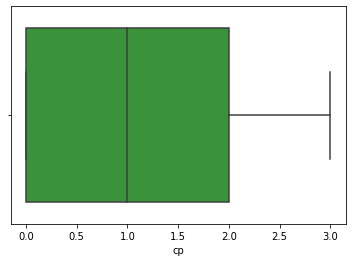

In [12]:
sns.boxplot(x=data["cp"], color="C2")

No outliers in the cp column.

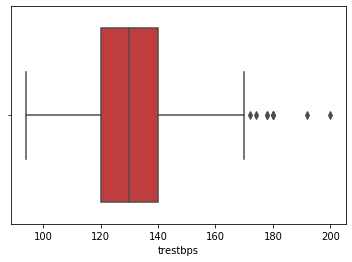

In [13]:
sns.boxplot(x=data["trestbps"], color="C3")

We have some outliers in the trestbps column, let's replace them by suitable values:

In [14]:
Q25th=np.percentile(data["trestbps"],25)
Q75th=np.percentile(data["trestbps"],75)
IQR=Q75th-Q25th
L=Q25th-IQR*1.5
R=Q75th+IQR*1.5
n=len(data["trestbps"])


for i in range(n):
    if data["trestbps"][i]<L:
        data["trestbps"].replace(data["trestbps"][i], L, inplace=True)
    if data["trestbps"][i]>R:
        data["trestbps"].replace(data["trestbps"][i], R, inplace=True)


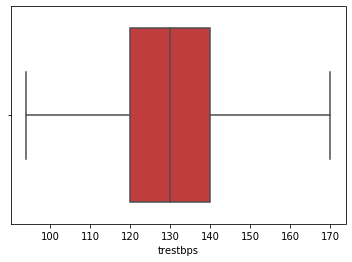

In [15]:
# checking the column after replacement.
sns.boxplot(x=data["trestbps"], color="C3")

Now, it looks good!

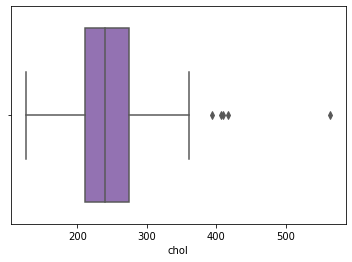

In [16]:
sns.boxplot(x=data["chol"], color="C4")

We have some outliers in "chol" column.

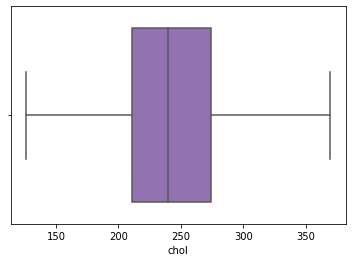

In [17]:
Q25th=np.percentile(data["chol"],25)
Q75th=np.percentile(data["chol"],75)
IQR=Q75th-Q25th
L=Q25th-IQR*1.5
R=Q75th+IQR*1.5
n=len(data["chol"])

for i in range(n):
    if data["chol"][i]<L:
        data["chol"].replace(data["chol"][i], L, inplace=True)
    if data["chol"][i]>R:
        data["chol"].replace(data["chol"][i], R, inplace=True)

            
        
sns.boxplot(x=data["chol"], color="C4")

No outlier!

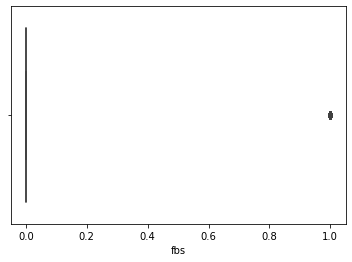

In [18]:
sns.boxplot(x=data["fbs"], color="C5")

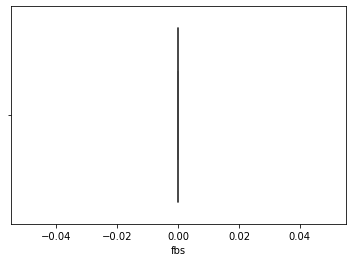

In [19]:
Q25th=np.percentile(data["fbs"],25)
Q75th=np.percentile(data["fbs"],75)
IQR=Q75th-Q25th
L=Q25th-IQR*1.5
R=Q75th+IQR*1.5
n=len(data["fbs"])

for i in range(n):
    if data["fbs"][i]<L:
        data["fbs"].replace(data["fbs"][i], L, inplace=True)
    if data["fbs"][i]>R:
        data["fbs"].replace(data["fbs"][i], R, inplace=True)

            
        
sns.boxplot(x=data["fbs"], color="C5")

We can delete this column because all its values are zero.

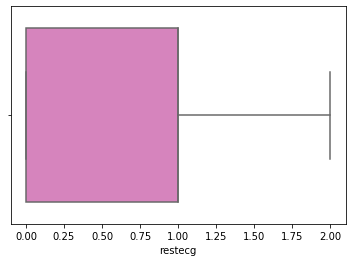

In [20]:
sns.boxplot(x=data["restecg"], color="C6")

Good!

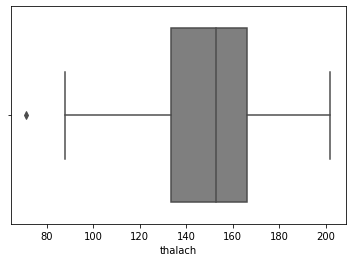

In [21]:
sns.boxplot(x=data["thalach"], color="C7")

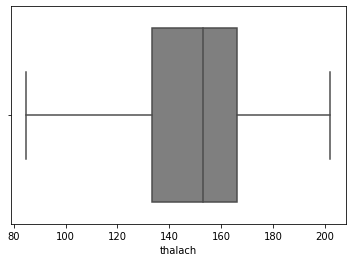

In [22]:
Q25th=np.percentile(data["thalach"],25)
Q75th=np.percentile(data["thalach"],75)
IQR=Q75th-Q25th
L=Q25th-IQR*1.5
R=Q75th+IQR*1.5
n=len(data["thalach"])

for i in range(n):
    if data["thalach"][i]<L:
        data["thalach"].replace(data["thalach"][i], L, inplace=True)
    if data["thalach"][i]>R:
        data["thalach"].replace(data["thalach"][i], R, inplace=True)

            
        
sns.boxplot(x=data["thalach"], color="C7")

Very good!

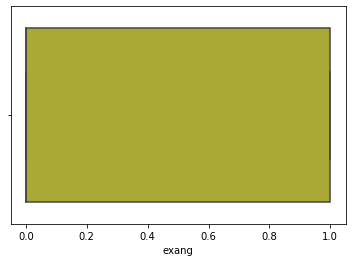

In [23]:
sns.boxplot(x=data["exang"], color="C8")

Good!

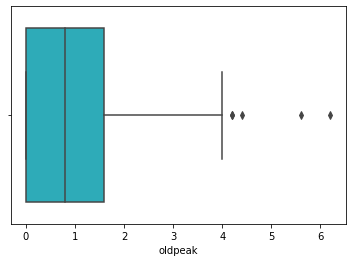

In [24]:
sns.boxplot(x=data["oldpeak"],color="C9")

For this column let's use another method, sqrt.

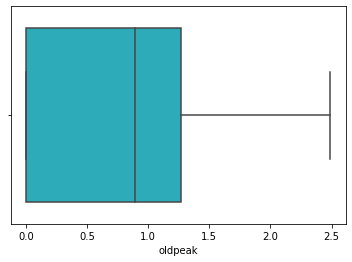

In [25]:
data["oldpeak"]=np.sqrt(data["oldpeak"])
sns.boxplot(x=data["oldpeak"], color="C9")

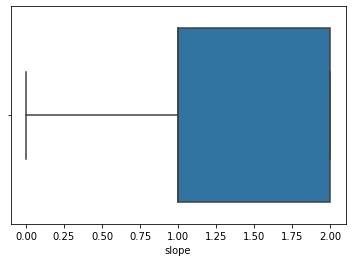

In [26]:
sns.boxplot(x=data["slope"], color="C10")

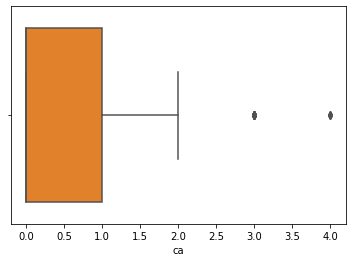

In [27]:
sns.boxplot(x=data["ca"], color="C11")

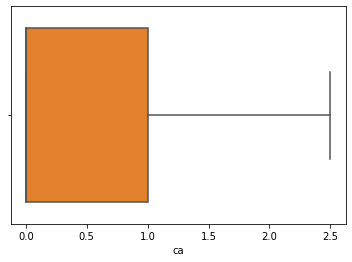

In [28]:
Q25th=np.percentile(data["ca"],25)
Q75th=np.percentile(data["ca"],75)
IQR=Q75th-Q25th
L=Q25th-IQR*1.5
R=Q75th+IQR*1.5
n=len(data["ca"])

for i in range(n):
    if data["ca"][i]<L:
        data["ca"].replace(data["ca"][i], L, inplace=True)
    if data["ca"][i]>R:
        data["ca"].replace(data["ca"][i], R, inplace=True)

            
        
sns.boxplot(x=data["ca"], color="C11")

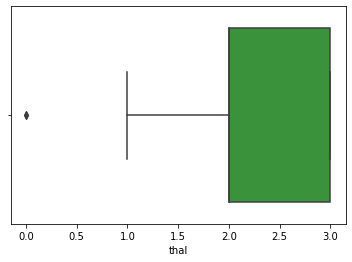

In [29]:
sns.boxplot(x=data["thal"], color="C12")

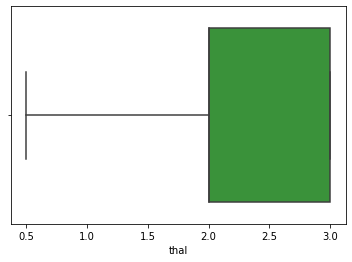

In [30]:
Q25th=np.percentile(data["thal"],25)
Q75th=np.percentile(data["thal"],75)
IQR=Q75th-Q25th
L=Q25th-IQR*1.5
R=Q75th+IQR*1.5
n=len(data["thal"])

for i in range(n):
    if data["thal"][i]<L:
        data["thal"].replace(data["thal"][i], L, inplace=True)
    if data["thal"][i]>R:
        data["thal"].replace(data["thal"][i], R, inplace=True)

            
        
sns.boxplot(x=data["thal"], color="C12")

### 3.3 Correlation

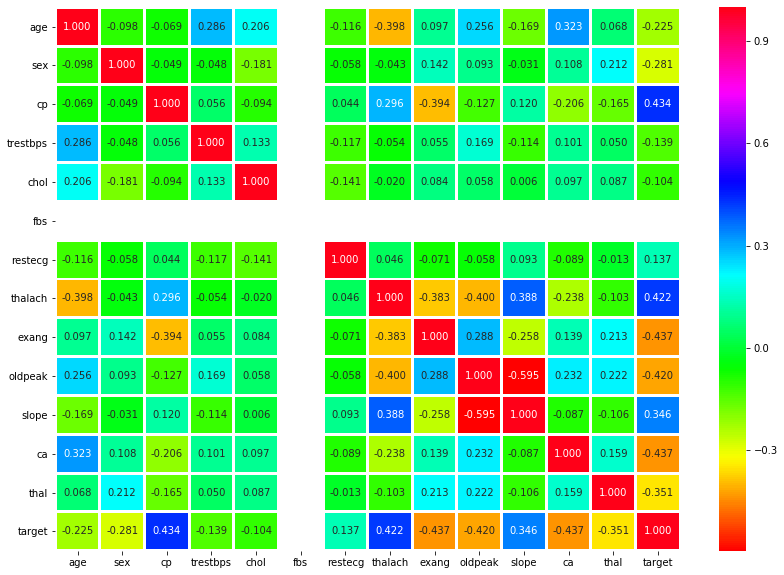

In [41]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True, cmap="hsv", fmt=".3f",linewidths=2)

The following Data Frame shows the correlation of each column with the target.

In [31]:
Correlation=[(c, data[c].corr(data['target'])) for c in data.columns]
Corr=pd.DataFrame(Correlation, columns=["Column", "Corr with target"])

In [32]:
Corr.sort_values("Corr with target", ascending=True).reset_index()

,index,Column,Corr with target
0,11,ca,-0.437369
1,8,exang,-0.436757
2,9,oldpeak,-0.419736
3,12,thal,-0.350974
4,1,sex,-0.280937
5,0,age,-0.225439
6,3,trestbps,-0.138621
7,4,chol,-0.103987
8,6,restecg,0.137230
9,10,slope,0.345877


Columns with most correlation:

In [33]:
Corr[np.abs(Corr["Corr with target"])>0.3].reset_index()

,index,Column,Corr with target
0,2,cp,0.433798
1,7,thalach,0.422210
2,8,exang,-0.436757
3,9,oldpeak,-0.419736
4,10,slope,0.345877
5,11,ca,-0.437369
6,12,thal,-0.350974
7,13,target,1.000000


In the following, I am going to use all columns, but one can just use the columns with most correlation. 

### 3.4 Training the First Model

In [68]:
# data(X) and target(y)
X=data.drop(columns="target", axis=1)

y=data["target"]


In [69]:
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233.0,0,0,150.0,0,1.516575,0,0.0,1.0
1,37,1,2,130,250.0,0,1,187.0,0,1.870829,0,0.0,2.0
2,41,0,1,130,204.0,0,0,172.0,0,1.183216,2,0.0,2.0
3,56,1,1,120,236.0,0,1,178.0,0,0.894427,2,0.0,2.0
4,57,0,0,120,354.0,0,1,163.0,1,0.774597,2,0.0,2.0


I am going to use "sklearn.preprocessing.MinMaxScaler" to change the range of features(columns).

In [70]:
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(X)

In [71]:
X1=X
n=X.shape[0]
y=y.values
I=np.ones(n)

In [72]:
# Add a column of unit values to X
X=np.column_stack((I, X))

Sigmoid function

In [73]:
def Sigm(X):
    return (1/(1+(np.exp(-X))))

Text(0.5, 1.0, 'Sigmoid function')

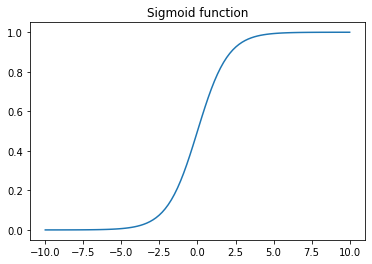

In [74]:
# an example to show Sigmoid function

x=np.linspace(-10,10, 100)
y1=Sigm(x)
plt.plot(x,y1)
plt.title("Sigmoid function")

In [75]:
def h1(X,W):      #h_w for the first model
    return Sigm(X@(W.T))

In [76]:
# Cost function for the first model
def cost1(X,W,y, Lambda):
    m = x.shape[0]  
    return ((1/m)*np.sum(-y*np.log(h1(X,W))-(1-y)*np.log(1-h1(X,W))))+ (Lambda/2)*(W@W.T)

In [77]:
def gradient1(X, y, W):     #gradient of the cost function for the first model 
    m = X.shape[0]
    return ((1 / m) * X.T@(h1(X,W)- y))+Lambda*W

In [145]:
#Gradient Descent for the first model
l=100  #the number of updates
W=np.zeros(X.shape[1]) # the starting W
alpha=0.6   # learning rate
Lambda=1   # penalty term

c=np.zeros(l) # c,d are used for plotting the cost function
d=np.zeros(l)

for i in range(l):
    W+=-alpha*gradient1(X, y, W)
    c[i]=cost1(X,W,y, Lambda)
    d[i]=i
    

In [146]:
print("Parameter vector W=", W)

Parameter vector W= [ 0.0320238  -0.00318143 -0.03957846  0.07967505  0.00109282  0.00584315
  0.          0.02529209  0.05587879 -0.08336404 -0.04162971  0.0715708
 -0.06448467 -0.01686326]


In [148]:
print("The value of gradient at the obtained W is=",gradient1(X, y, W))


The value of gradient at the obtained W is= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


As it can be seen from the gradient, the obtained W is the optimal W. 

In [149]:
#prediction function
y_pred1=np.zeros(303)
for i in list(range(X.shape[0])):
    if h1(X,W)[i]> 0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0
# accuracy for the first model
def accuracy1(y_pred1):
    return np.mean(y==y_pred1)          

In [150]:
print(f"The value of cost function after minimization is {cost1(X,W,y, Lambda)}.")

The value of cost function after minimization is 2.017710747798444.


### 3.5 Wavelet method

In [84]:
# first two Haar wavelet functions

def h_1(x):
    if x <=1 and x>=0:
        return 1
    else:
        return 0


def h_2(x):
    if x <0.5 and x>=0:
        return 1
    elif x > 0.5 and x<=1:
        return -1
    else:
        return 0
        
# two first haar functions

Text(0.5, 1.0, 'The second Haar wavelet $h_{2}$')

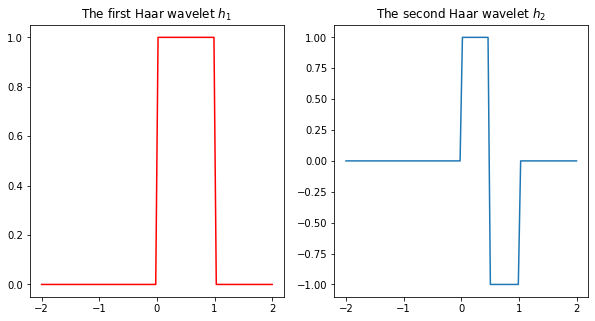

In [85]:
# the plot of h_1, h_2

x2=np.linspace(-2,2, 100)
H1=np.array([h_1(x) for x in x2])
H2=np.array([h_2(x) for x in x2])

fig,ax=plt.subplots(1,2, figsize=(10,5))
ax[0].plot(x2,H1, color="r")
ax[0].set_title("The first Haar wavelet $h_{1}$")

ax[1].plot(x2,H2)
ax[1].set_title("The second Haar wavelet $h_{2}$")

In [86]:
# Haar wavelet for matrix form

def H(x):
    for i in list(range(0,len(X1[:,0]),1)):
        for j in list(range(0,len(X1[0,:]),1)):
            if x[i,j]<=0.5:
                x[i,j]= 1
            else:
                x[i,j]=-1
    return x

In [87]:
X2=H(X1)
I=np.ones(303)
X2=np.column_stack((I, X1))

In [88]:
#sigmoid function
def sigm2(X2):
    return 1/(1+(np.exp(-X2)))

In [89]:
def h2(X2,W2): #h_w for Haar wavelet method
    return sigm2(X2@(W2.T))

In [90]:
def cost2(X2,W2,y, Lambda2):     #cost function for Haar wavelet method
    m = X2.shape[0]  
    return ((1/m)*np.sum(-y*np.log(h2(X2,W2))-(1-y)*np.log(1-h2(X2,W2))))+ (Lambda2/2)*(W2@W2.T)

In [91]:
def gradient2(X2, y, W2):   
    # Computes the gradient of the cost function for Haar wavelet method
    m = X2.shape[0]
    return ((1 / m) * X2.T@(h2(X2,W2)- y))+Lambda2*W2

In [161]:
l2=100  #the number of updates
W2=np.zeros(X2.shape[1])  #start point for gradient descent
alpha2=0.6  #learning rate
Lambda2=0.7    # penalty term

c2=np.zeros(l2)# c2, d2 are used for plotting the cost function
d2=np.zeros(l2)

for i in range(l2):
    W2+=-alpha2*gradient2(X2, y, W2)
    c2[i]=cost2(X2,W2,y, Lambda2)
    d2[i]=i

In [162]:
print("Parameter vector W obtained by Haar Wavelet=", W2)

Parameter vector W obtained by Haar Wavelet= [ 0.00480108  0.10519895  0.13233912 -0.1463808   0.03311142  0.06741444
  0.00480108  0.01065642 -0.13291093  0.17304822  0.13617912 -0.15855502
  0.130299   -0.02132941]


In [163]:
print("The value of gradient at obtained W is=",gradient2(X2, y, W2)) 

The value of gradient at obtained W is= [-8.23993651e-18  0.00000000e+00  1.38777878e-17  1.38777878e-17
 -1.38777878e-17 -6.93889390e-18 -8.23993651e-18 -9.54097912e-18
  1.38777878e-17 -1.38777878e-17 -5.55111512e-17  0.00000000e+00
 -4.16333634e-17  6.93889390e-18]


Almost zero!

In [164]:
y_pred2=np.zeros(303)   #predict function
for i in list(range(X2.shape[0])):
    if h2(X2,W2)[i]>= 0.5:
        y_pred2[i]=1
    else:
        y_pred2[i]=0

def accuracy2(y_pred2):     #accuracy function
    return np.mean(y==y_pred2)

In [165]:
print(f"The value of cost function after minimization is {cost2(X2,W2,y, Lambda2)}.")

The value of cost function after minimization is 0.5944774656860428.


## 4. Conclusions

In the following figures, the cost functions in both methods are plotted.
As you can see in the Haar wavelet method, the cost function decreases very fast and gets to its minimum.
This tells us that the Haar wavelet basis is much better than the polynomial basis to predict heart disease.
The values of both cost functions after minimization also represent our claim.

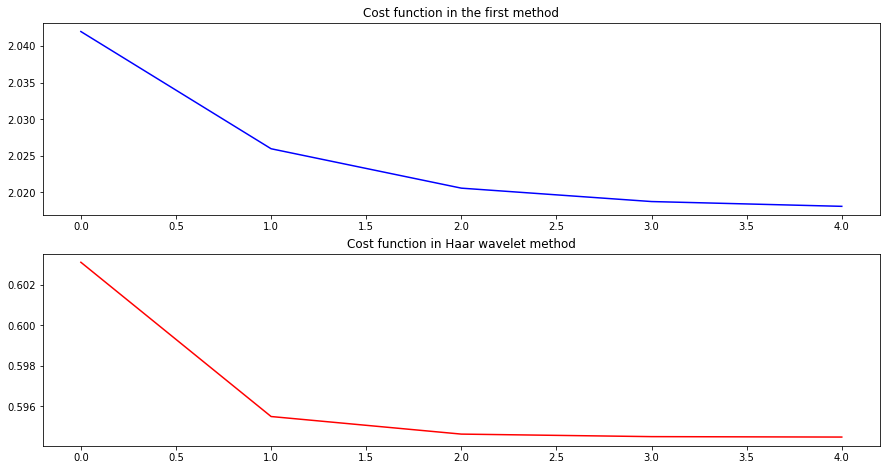

In [186]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(d[:5], c[:5], 'b')
plt.title("Cost function in the first method")
plt.subplots_adjust(top = 1.3)
plt.subplot(2,1,2)
plt.plot(d2[:5],c2[:5], 'r')
plt.title("Cost function in Haar wavelet method")
plt.show()